In [74]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import os
import sys
sys.path.append(os.path.abspath('..'))

from log_processing import process_log

In [75]:
file = "../../backtests/test.log"
trader_data, products_data, activities, trades = process_log(file)

In [76]:
kelp = products_data["KELP"]

[ 4.  3. nan]
0


<Axes: >

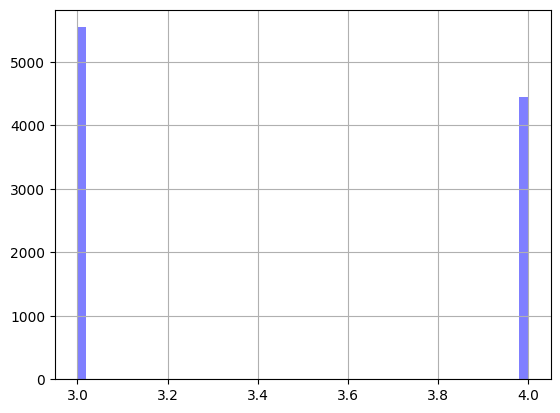

In [77]:
mm_spread = kelp["mm_spread"]
spreads = kelp["mm_spread"].unique()
print(spreads)
print(mm_spread[mm_spread == 2].count())

kelp["mm_spread"].hist(bins=50, color='blue', alpha=0.5, label='mm_spread')

In [78]:
mm_price = kelp["mm_price"]
fair = kelp["fair_value"]
vwap = kelp["vwap"]

nan_indices = mm_spread[mm_spread.isna()].index
indices_of_interest = []
for index in nan_indices:
    indices_of_interest.append(index - 1)
    indices_of_interest.append(index)
    indices_of_interest.append(index + 1)

mm_price_interest = mm_price.loc[indices_of_interest].values
vwap_interest = vwap.loc[indices_of_interest].values
fair_interest = fair.loc[indices_of_interest].values

In [79]:
times = kelp["timestamp"].loc[indices_of_interest]
activity = activities[activities["timestamp"].isin(times)]
activity = activity[activity["product"] == "KELP"].reset_index()
activity["mm_price"] = mm_price_interest
activity["vwap"] = vwap_interest
activity["fair_value"] = fair_interest

In [83]:
activity[["mm_price", "vwap", "fair_value", "ask_price_1", "bid_price_1", "ask_volume_1", "bid_volume_1", "ask_price_2", "ask_volume_2", "ask_price_3", "ask_volume_3",   "bid_price_2", "bid_volume_2", "bid_price_3", "bid_volume_3"]]

,mm_price,vwap,fair_value,ask_price_1,bid_price_1,ask_volume_1,bid_volume_1,ask_price_2,ask_volume_2,ask_price_3,ask_volume_3,bid_price_2,bid_volume_2,bid_price_3,bid_volume_3
0,2031.5,2031.44,2031.50,2032,2030,4,29,2033.0,29.0,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,2031.50,2031.50,2033,2030,20,14,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2031.0,2031.00,2031.19,2033,2029,25,25,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2038.0,2038.00,2038.00,2040,2036,30,30,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,2036.75,2038.00,2037,2036,4,23,2038.0,1.0,2039.0,1.0,NaN,NaN,NaN,NaN
5,2038.0,2037.89,2038.00,2038,2036,3,29,2039.0,1.0,2040.0,28.0,NaN,NaN,NaN,NaN
6,2035.5,2035.50,2035.62,2037,2034,22,22,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,NaN,2034.88,2035.55,2035,2034,4,22,2036.0,2.0,2037.0,2.0,NaN,NaN,NaN,NaN
8,2036.0,2035.96,2035.83,2037,2034,2,24,2038.0,22.0,NaN,NaN,NaN,NaN,NaN,NaN
9,2035.5,2035.48,2035.50,2036,2034,1,29,2037.0,29.0,NaN,NaN,NaN,NaN,NaN,NaN
